# Introduction

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

What Data Will I Use in This Homework?
In this homework, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

Check out the “Data” tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers and report your score here that is given to you by Kaggle. 

Submission File Format for Kaggle:

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)

Following is the link to the Titanic: Machine Learning from Disaster competition 
https://www.kaggle.com/competitions/titanic

There is a video tutorial that you can watch for clarification on how to submit your predictions. You can also post your questions in discord or the Titanic discussion forum in Kaggle. 

Before you perform prediction I would like you to do some Exploratory Data Analysis and pre-processing of the data. Follow the steps below to complete your homework.

# Import the libraries 

In [2]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import re

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Getting the data

In [3]:
# load the training and test data
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
combine = [train_df, test_df]

# Data Exploration and Analysis

In [4]:
# show the training data information using the info() method
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Below I have listed the features with a short description:

survival:    Survival 
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation

From the above information, how many features are there? And which one is the target variable?

Your Answer:

There are 9 features. The target variable should be survival as we are trying to find the people who will survive the sink.


In [5]:
# show the summary of the training data using the describe() method

train_df.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


What percentage of people from the training data survived the incident? 

Your Answer: 38% percent


What is the passenger age range in the training data?

Your Answer:

79.58 is the range.


In [6]:
# show the first 10 data points of the training data using the head() method

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


When you will look at the data sample and the summary, first of all, you will find that you need to convert a lot of features into numeric ones, so that the machine learning algorithms can process them. Furthermore, you will see that the features have widely different ranges, that you will need to convert into roughly the same scale. You can also spot some more features, that contain missing values (NaN = not a number), that you need to deal with.

In [7]:
# list the attributes which have missing values 

#- Cabin for Mr. Owen Harris

#- Cabin for Miss Laina

#- Cabin for Mr. William Henry

# Age for Mr. James

# Cabin for Mr. Jmes

# cabin for Mr. leonard

# cabin for Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg

# Cabin for Mrs. Nicholas

# Show the number of missing values for each of the attributes above and show percentage of missing values

# 8/120 are missing values so about 6.67%.

display(train_df.isnull().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Explain the features with missing values here.

Your Answer: Age, cabin and embarked




What features could contribute to a high survival rate ? (write you guess here)

Your Answer:
Feature Like Cabin (location of room inside ship), Ticket class and fare.

# Age and Sex

Create four histograms two for male (survived vs not survived) and two for female (survived vs not survived) where the x axis represents their age and y axis will represent the count of male/female in that age bucket who survived / not survived. 

Text(0.5, 1.0, 'Males that did not Survived')

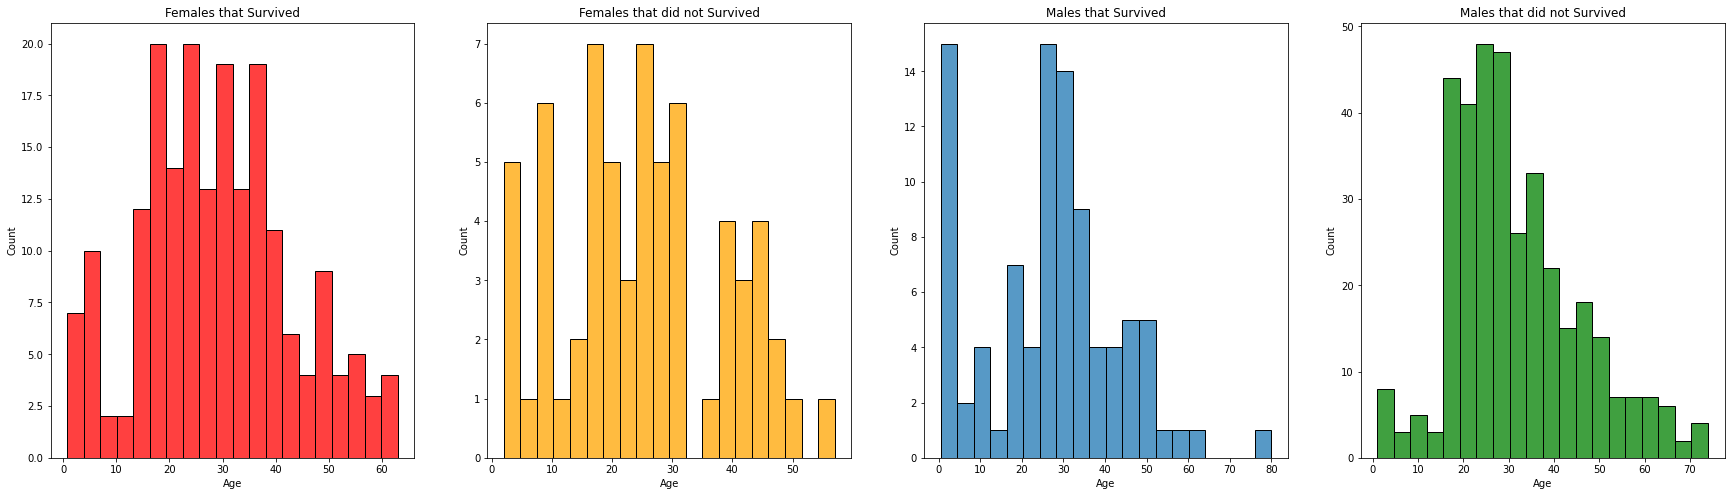

In [8]:
# code goes here for creating the histograms

#sns.countplot("Sex",hue= "Survived", data=train_df)

#sns.histplot(data=train_df, y="Age", hue="Survived")

#sns.boxplot(x="Age",y="Survived", hue="Sex", data=train_df)

#sns.displot(data=train_df, x="Sex", hue="Survived")


fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(30,8))
women = train_df[train_df['Sex']=='female']

ax = sns.histplot(women[women['Survived']==1].Age.dropna(), ax = axes[0],bins = 20, kde =False, color = 'red')
ax.set_title('Females that Survived')

ax = sns.histplot(women[women['Survived']==0].Age.dropna(), ax  = axes[1],bins =20, kde =False , color = 'orange')
ax.set_title('Females that did not Survived')

men = train_df[train_df['Sex']=='male']

ax = sns.histplot(men[men['Survived']==1].Age.dropna(), ax = axes[2],bins =20, kde = False)
ax.set_title('Males that Survived')

ax = sns.histplot(men[men['Survived']==0].Age.dropna(), ax = axes[3],bins =20, kde = False, color = 'green')
ax.set_title('Males that did not Survived')




Explain what you see from the histogram. For example: try to answer the following questions.

1. Which age group has high probability of survial in male?
    Under 1 and 30
2. Which age group has high probability of survial in female?
    20-40
3. Which age group has low probability of survial in male?
    0-15
4. Which age group has low probability of survial in female?
    Above 50

Your Answer:


# Embarked, Pclass and Sex:

Find the correlation of Embarked, Pclass and Sex with survival and explain your finding. 


C:\Users\saudm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

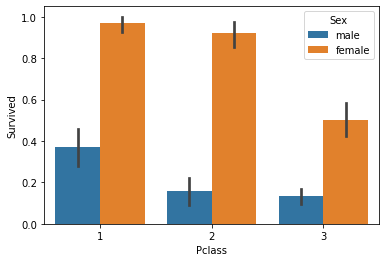

In [9]:
# your code for correlation goes here

#sns.barplot(x="Pclass", y="Embarked", hue="Survived", data=train_df)

sns.barplot("Pclass","Survived","Sex", data=train_df)

Explain the correlations.

Your Answer:

In all Pclasses, Majority of femailes are the ones who survived.

# Pclass

create boxplot for Pclass and survived people


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

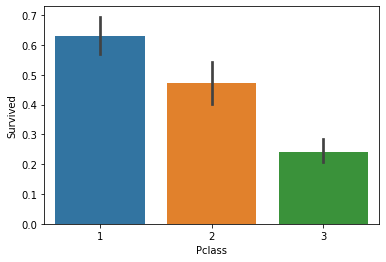

In [10]:
# your code for boxplot goes here

#sns.boxplot(x= "Pclass",y="Survived", data=train_df)

#sns.boxplot(x="Survived", y="Pclass", data=train_df)

sns.barplot(x="Pclass", y="Survived", data=train_df)

#sns.boxplot(x="Pclass", y="Survived", data=train_df)


Explain what you see in the above boxplot.

Your answer: Pclass 1 had the highest survivability rate


Create histograms for Pclass and survival over age. There will be six plots where x-axis will represent age and y-axis the frequency. Following are the options for those six plots.

Pclass = 1 and survival = 0
Pclass = 1 and survival = 1
Pclass = 2 and survival = 0
Pclass = 2 and survival = 1
Pclass = 3 and survival = 0
Pclass = 3 and survival = 1


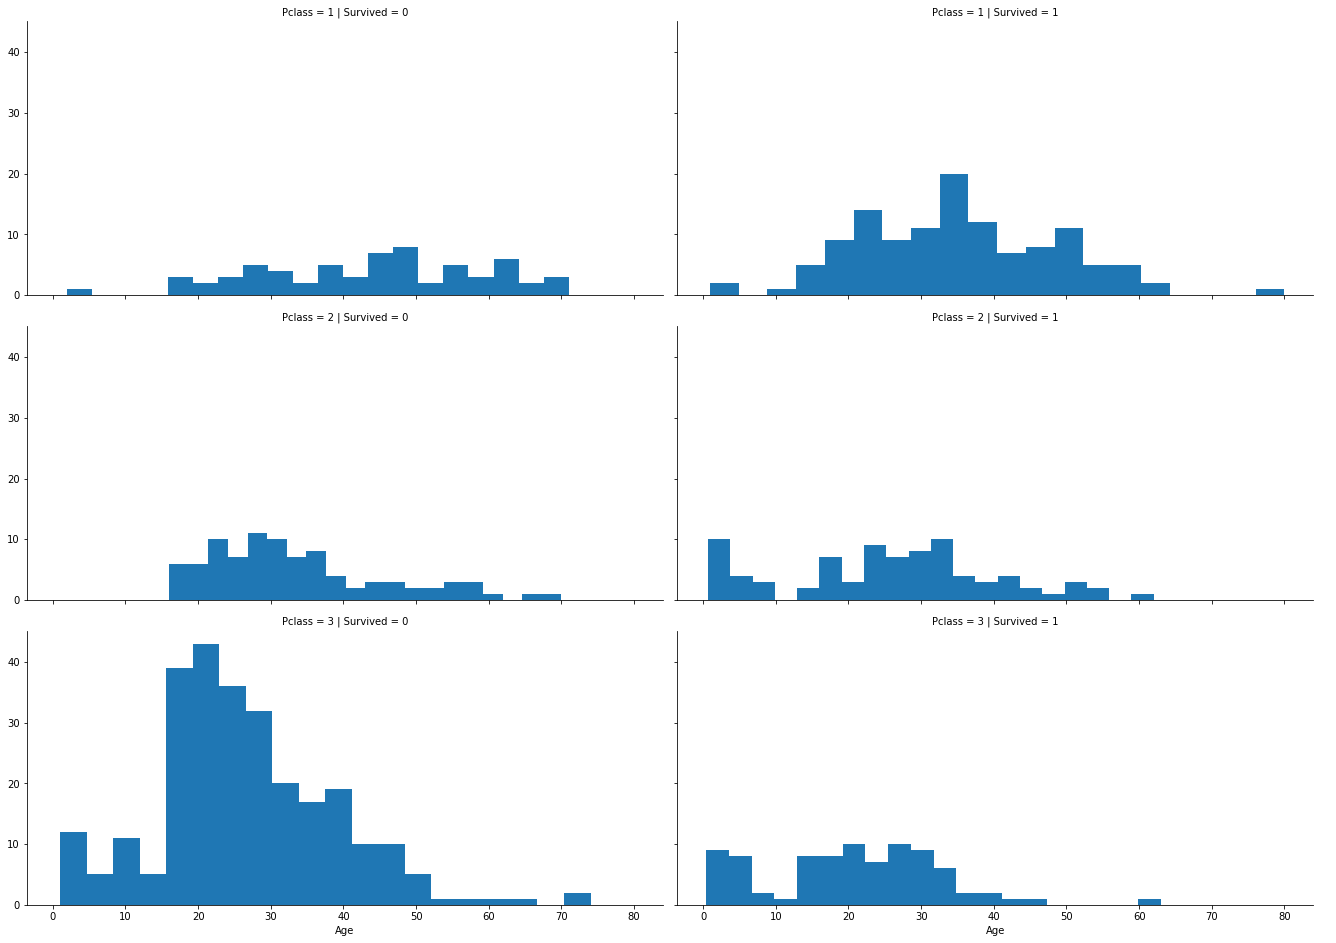

In [11]:
# your code for histogram goes here

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=4.4, aspect=2.1)
grid.map(plt.hist, 'Age', alpha=1, bins=20)
grid.add_legend();

Explain the histogram plots.

Your answer:  Pclass 3 had the highest survivability rate while and Pclass 2 was low


# SibSp and Parch
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic 

Above is the description of SibSp and Parch features. SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. Create two features one is a relatives feature by summing SibSp and Parch and another is an lone feature that shows if someone is not alone.

1    537
0    354
Name: not_alone, dtype: int64


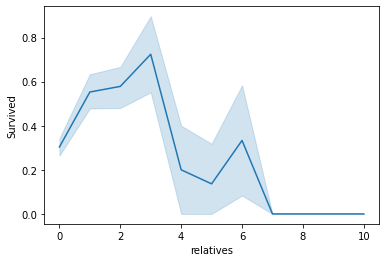

In [12]:
# your code goes here to create relatives and alone (0 means not-alone and 1 means alone) features for both train and test data

data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

# show distribution of alone and not-alone 

# show a line-plot of relatives vs survived 
 
#sns.factorplot('relatives','Survived', data=train_df, aspect = 2.0, )

sns.lineplot(data=train_df, x="relatives", y="Survived")
print(train_df['not_alone'].value_counts())

Explain your finding from the above line-plot of relatives vs survived

Your answer: Highest survivability was between 0 and 3 rerlatives


In [13]:
#Extra Data Info

# Data Pre-processing
First drop the passengerID from both the training and test set as it is not an interesting feature to deal with.


In [14]:
# your code goes here for dropping passengerID

train_df = train_df.drop(['PassengerId'], axis=1)
test_df = test_df.drop(["PassengerId"], axis=1)
test_df.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,0
5,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,1
6,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0,1
7,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,2,0
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0,1
9,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,2,0


# Missing Data Replacement
1. Cabin: As a reminder, you have to deal with Cabin (687), Embarked (2) and Age (177) missing values. You might think that you have to delete the ‘Cabin’ variable but there is something interesting about cabin number. A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore you are going to extract these and create a new feature, that contains a persons deck number which is an important feature. Afterwords you will convert the feature into a numeric variable. The missing values will be converted to zero. The actual decks of the titanic, ranging from A to G.

In [15]:
# your code goes here to create a Deck feature for both train and test data
deck = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'U': 8}
data = [train_df, test_df]

for dataset in data:
    dataset["Cabin"] = dataset["Cabin"].fillna("U0")
    dataset["Deck"] = dataset["Cabin"].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset["Deck"] = dataset["Deck"].map(deck)
    dataset["Deck"] = dataset["Deck"].fillna(0)
    dataset["Deck"] = dataset["Deck"].astype(int)

# your code goes here to drop the cabin feature for both train and test data
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0,1,8
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,1,5
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4,0,8
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,2,0,8
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,0,8


2. Age: Now you have to tackle the issue with the age features missing values. You will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null. You will basically create is_null amount of random numbers with in the range mean - std and mean + std.


In [16]:
# your code goes here for filling up the missing values for Age feature for both train and test data

data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # random numbers between the mean, std and is_null
    random_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # filling missing values in Age column with random values generated
    ageSplit = dataset["Age"].copy()
    ageSplit[np.isnan(ageSplit)] = random_age
    dataset["Age"] = ageSplit
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()
display(train_df.isnull().sum())

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     2
relatives    0
not_alone    0
Deck         0
dtype: int64

3. Embarked: Since the Embarked feature has only 2 missing values, you will just fill these with the most common one.


In [17]:
# your code goes here for filling up the missing values for Embarked for both train and test data

#Finds most common feature
train_df['Embarked'].describe()
#Replaces missing with 'S'
common_value = 'S'
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64

# Converting features
From the data you can see that ‘Fare’ is a float and you have to deal with 4 categorical features: Name, Sex, Ticket and Embarked. Investigate and transfrom these features one after another.

Fare: Convert “Fare” from float to int64, using the “astype()” function from pandas 

In [18]:
# your code goes here for both train and test data
data = [train_df, test_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype("int64")
train_df.head(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,0,1,8
5,0,3,"Moran, Mr. James",male,37,0,0,330877,8,Q,0,1,8
6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51,S,0,1,5
7,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21,S,4,0,8
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11,S,2,0,8
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30,C,1,0,8


Name: You will use the Name feature to extract the Titles from the Name, so that you can build a new feature out of that.


In [19]:
#code is given for you 

data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+).', expand=False)

    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,8,1.0
1,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3.0
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2.0
3,1,1,female,35,1,0,113803,53,S,1,0,3,3.0
4,0,3,male,35,0,0,373450,8,S,0,1,8,1.0
5,0,3,male,37,0,0,330877,8,Q,0,1,8,1.0
6,0,1,male,54,0,0,17463,51,S,0,1,5,1.0
7,0,3,male,2,3,1,349909,21,S,4,0,8,4.0
8,1,3,female,27,0,2,347742,11,S,2,0,8,3.0
9,1,2,female,14,1,0,237736,30,C,1,0,8,3.0


Sex: Convert ‘Sex’ feature into numeric (male 0 and female 1)

In [20]:
# your code goes here for both train and test data

gender = {"male": 0, "female": 1}
data = [train_df, test_df]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)
    dataset['Sex'].astype(float)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,0,8,1.0
1,1,1,1,38,1,0,PC 17599,71,C,1,0,3,3.0
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,0,1,8,2.0
3,1,1,1,35,1,0,113803,53,S,1,0,3,3.0
4,0,3,0,35,0,0,373450,8,S,0,1,8,1.0


Ticket: Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So drop it from the dataset.


In [21]:
# your code goes here for dropping the ticket attribute from both training and test data

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,S,1,0,8,1.0
1,1,1,1,38,1,0,71,C,1,0,3,3.0
2,1,3,1,26,0,0,7,S,0,1,8,2.0
3,1,1,1,35,1,0,53,S,1,0,3,3.0
4,0,3,0,35,0,0,8,S,0,1,8,1.0
5,0,3,0,37,0,0,8,Q,0,1,8,1.0
6,0,1,0,54,0,0,51,S,0,1,5,1.0
7,0,3,0,2,3,1,21,S,4,0,8,4.0
8,1,3,1,27,0,2,11,S,2,0,8,3.0
9,1,2,1,14,1,0,30,C,1,0,8,3.0


Embarked: Convert ‘Embarked’ feature into numeric.


In [22]:
embarked_numeric = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

# your code goes here for both train and test data
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_numeric)
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,0,1,0,8,1.0
1,1,1,1,38,1,0,71,1,1,0,3,3.0
2,1,3,1,26,0,0,7,0,0,1,8,2.0
3,1,1,1,35,1,0,53,0,1,0,3,3.0
4,0,3,0,35,0,0,8,0,0,1,8,1.0
5,0,3,0,37,0,0,8,2,0,1,8,1.0
6,0,1,0,54,0,0,51,0,0,1,5,1.0
7,0,3,0,2,3,1,21,0,4,0,8,4.0
8,1,3,1,27,0,2,11,0,2,0,8,3.0
9,1,2,1,14,1,0,30,1,1,0,8,3.0


# Creating Categories

Create categories within the following features:

Age:
Convert the ‘age’ feature. First convert it from float into integer using astype() method. Then create the new ‘AgeGroup” variable, by categorizing every age into a group. Note that it is important to place attention on how you form these groups, since you don’t want for example that 80% of your data falls into group 1. You can use the following ranges to create the age groups.

Age <= 11, AgeGroup = 0
Age > 11 and Age <= 18, AgeGroup = 1
Age > 18 and Age <= 22, AgeGroup = 2
Age > 22 and Age <= 27, AgeGroup = 3
Age > 27 and Age <= 33, AgeGroup = 4
Age > 33 and Age <= 40, AgeGroup = 5
Age > 40 and Age <= 66, AgeGroup = 6
Age > 66, AgeGroup = 7

This convertion makes sure to scale the age attribute. 

In [23]:
# your code goes here (do it for both train and test sets)
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

#Distribution of Ages into the categories

train_df['Age'].value_counts()

4    170
5    151
6    147
3    137
2    117
1     94
0     68
7      7
Name: Age, dtype: int64

Fare:
For the ‘Fare’ feature, you need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if you cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. 

In [24]:
# this code is given to you
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

# Creating new Features
Add two new features to the dataset, that you compute out of other features.


In [25]:
#1. Age times Class feature where you will create a Age_Class feature by multiplying Age and Class

data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [26]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class
0,0,3,0,2,1,0,0,0,1,0,8,1.0,6
1,1,1,1,5,1,0,3,1,1,0,3,3.0,5
2,1,3,1,3,0,0,0,0,0,1,8,2.0,9
3,1,1,1,5,1,0,3,0,1,0,3,3.0,5
4,0,3,0,5,0,0,1,0,0,1,8,1.0,15


In [27]:
#2. Fare per Person feature (the fare column has total fare someone paid)
# so dividing that fare with raltives + 1 will give you fare per person

data = [train_df, test_df]
for dataset in data:
    dataset['FarePerPerson'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['FarePerPerson'] = dataset['FarePerPerson'].astype(int)

In [28]:
# show the first 10 data points after all the above conversions using head() method

train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,FarePerPerson
0,0,3,0,2,1,0,0,0,1,0,8,1.0,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3.0,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2.0,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3.0,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1.0,15,1
5,0,3,0,5,0,0,1,2,0,1,8,1.0,15,1
6,0,1,0,6,0,0,3,0,0,1,5,1.0,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4.0,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3.0,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3.0,2,1


# Building Machine Learning Models
Now that your data is ready for training a model you will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, you need to use the predictions on the training set to compare the algorithms with each other. Later on, you will be using cross validation.

In [29]:
from sklearn.model_selection import train_test_split

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.5, random_state=1)

In [30]:
# Random Forest:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.5, random_state=1)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 3)

In [31]:
# Logistic Regression:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.5, random_state=1)

# your code goes here

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

YPrediction = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 3)

In [32]:
# K Nearest Neighbor:
# your code goes here

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 3)

In [33]:
# Gaussian Naive Bayes:
# your code goes here

gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 3)

In [34]:
# Perceptron:
# your code goes here

perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 3)

C:\Users\saudm\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [35]:
# Linear Support Vector Machine:
# your code goes here

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 3)

C:\Users\saudm\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [36]:
# Decision Tree
# your code goes here

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 3)

# Which is the best model?
Create a dataframe with the model name and calculated accuracy on the training data and show the table

In [37]:
# your code goes here for comparing the accuracy of the above 7 models

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron,acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
96.847,Random Forest
96.396,Decision Tree
87.387,Support Vector Machines
87.387,Logistic Regression
86.486,Naive Bayes
85.586,KNN
74.775,Perceptron


Which model performed the best?

Your Answer: Random Forest

Why do you this that model performed the best?

Your Answer: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.


# Find how Random Forest works with K-fold Cross Validation
K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let’s imagine you would split the given data into 4 folds (K = 4). Your random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.

The image below shows the process, using 4 folds (K = 4). Every row represents one training + evaluation process. In the first row, the model get’s trained on the first, second and third subset and evaluated on the fourth. In the second row, the model get’s trained on the second, third and fourth subset and evaluated on the first. K-Fold Cross Validation repeats this process till every fold acted once as an evaluation fold.

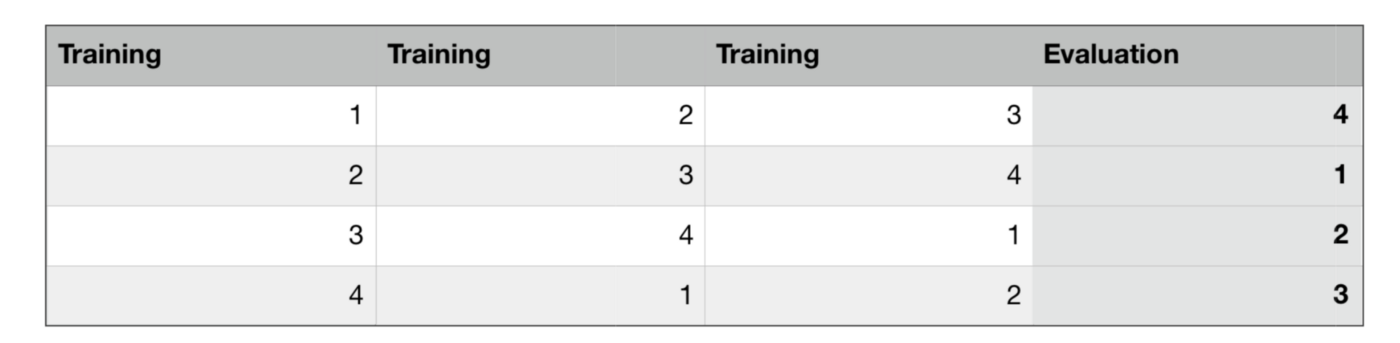

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to compute the mean and the standard deviation for these scores.

The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.

In [38]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75       0.90909091 0.90909091 0.81818182 0.72727273 0.63636364
 0.63636364 0.90909091 0.81818182 0.63636364]
Mean: 0.7750000000000001
Standard Deviation: 0.10873521558096078


This looks much more realistic than before. Our model has a average accuracy of 82% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are .

This means in our case that the accuracy of our model can differ + — 4%.

I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it’s performance even further in the following section. Now can you use K-fold cross validation for the rest of the six models and compare their accuracy and standand deviation? Perform this task and compare the results.

# Random Forest

# What is Random Forest ?

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

One big advantage of random forest is, that it can be used for both classification and regression problems, which form the majority of current machine learning systems. With a few exceptions a random-forest classifier has all the hyperparameters of a decision-tree classifier and also all the hyperparameters of a bagging classifier, to control the ensemble itself.

The random-forest algorithm brings extra randomness into the model, when it is growing the trees. Instead of searching for the best feature while splitting a node, it searches for the best feature among a random subset of features. This process creates a wide diversity, which generally results in a better model. Therefore when you are growing a tree in random forest, only a random subset of the features is considered for splitting a node. You can even make trees more random, by using random thresholds on top of it, for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

Below you can see how a random forest would look like with two trees:

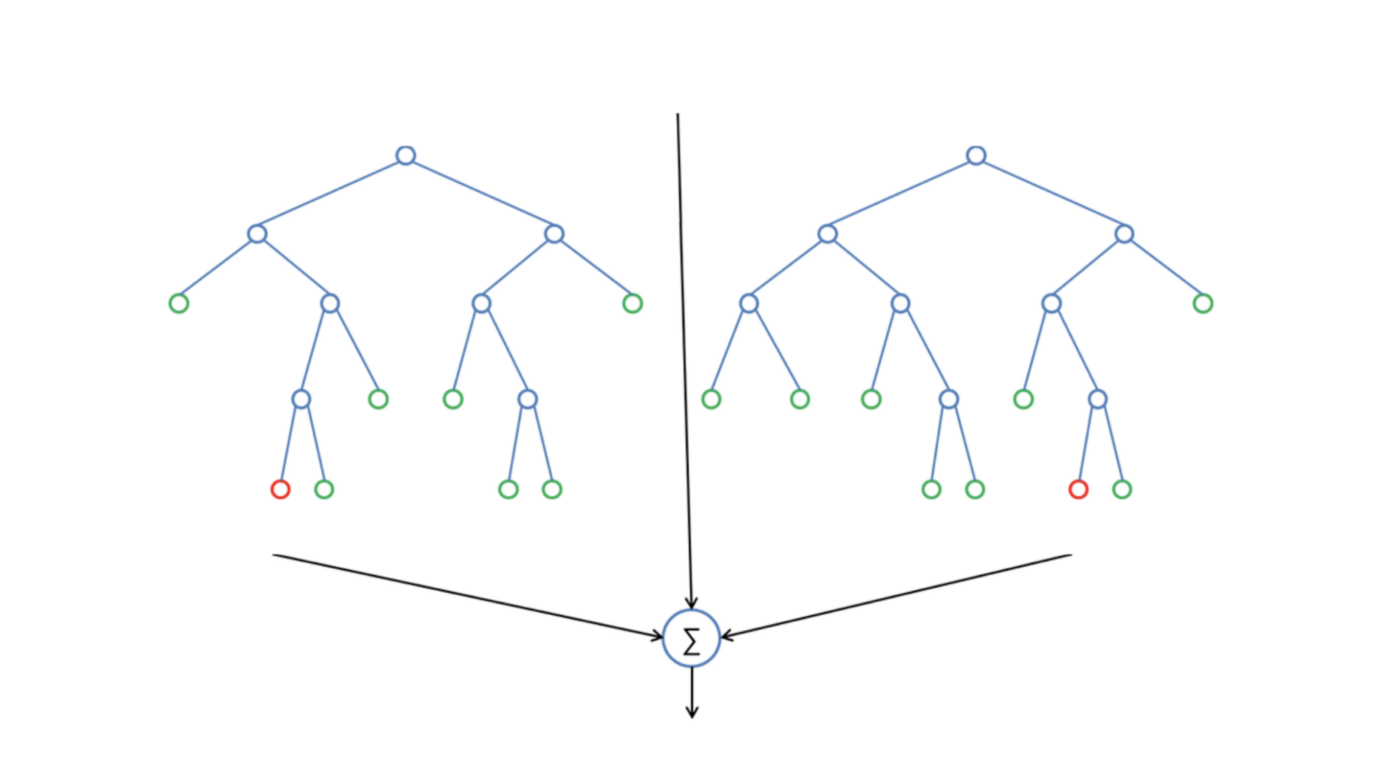


# Feature Importance

Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automatically for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below:

<AxesSubplot:xlabel='feature'>

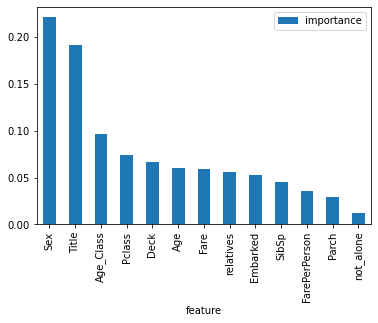

In [40]:
# plot the importance with a bar chart 
#sns.barplot(x="feature", y="importance")

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head()
importances.plot.bar()

Explain your findings from the above importance chart.

Your Answer: Sex was the highest of importance


# Conclusion:

Find the features that does not play a significant role in the random forest classifiers prediction process. Drop those features and model the Random Forest classifier again to see if it improves or not and report your findings.


In [41]:
# your code goes here




Write down your finding from the above modeling.

Your Answer:


Finally, use the predictions you have received from Random Forest model using the test data to submit your result in Kaggle and report the score here.

Your Answer: Accuracy Score on test data from Kaggle:  

0.82100


Make sure to run the cells in order from top to bottom. 

# Submission deadline: Thursday, April 21st (end of the day)